In [1]:
from vide import Vide
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import stan
import nest_asyncio

In [2]:
nest_asyncio.apply()

In [3]:
# Calculate the HPDI from posteriori samples

samples = np.random.normal(0, 1, 1000)
Vide.HPDI(samples)

(-1.5849917561093918, 1.6415162170825597)

In [4]:
# Generate samples from posterioris to alpha and beta
alpha = np.random.normal(0, 0.2, 250)
beta = np.random.normal(1, 0.5, 250)

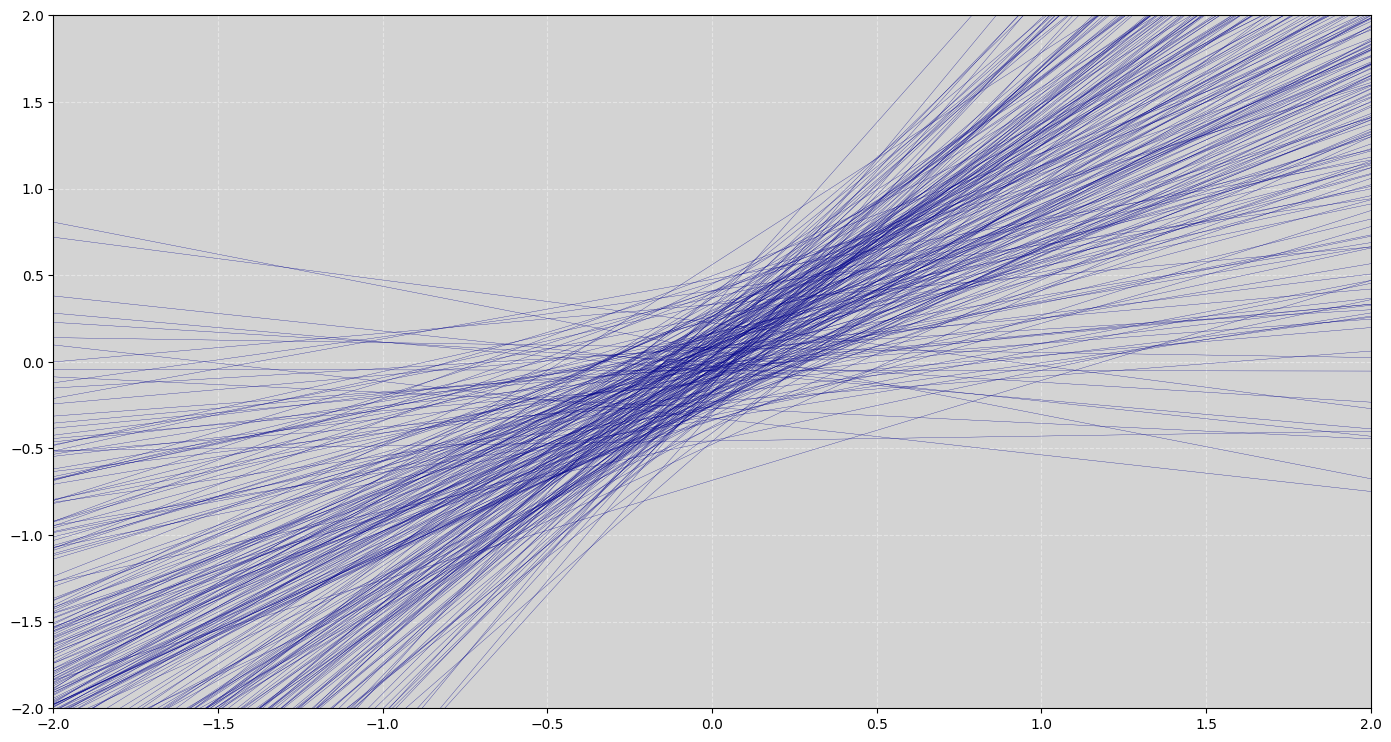

In [5]:
# Plot spaghetti 
Vide.plot_lines(alpha, beta)
plt.show()

In [6]:
# Calculate the μ and CI from posteriori
mu = Vide.mu_lm(alpha, beta)  # Line average
ci = Vide.CI_lm(alpha, beta)  # Compatibility Interval

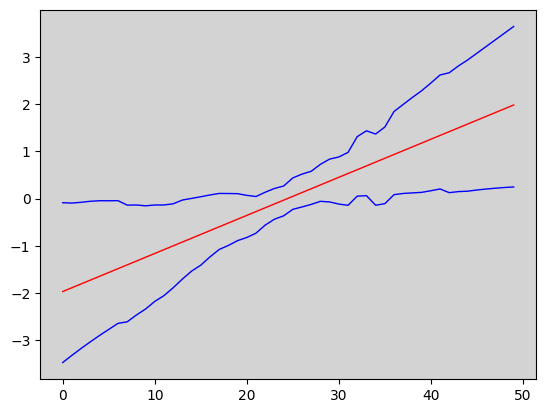

In [7]:
# Ploting results
plt.plot(ci[:, 0], 'b', lw=1)  # lower line,default 89%
plt.plot(ci[:, 1], 'b', lw=1)  # upper line, default 89%
plt.plot(mu, 'r', lw=1)

plt.show()

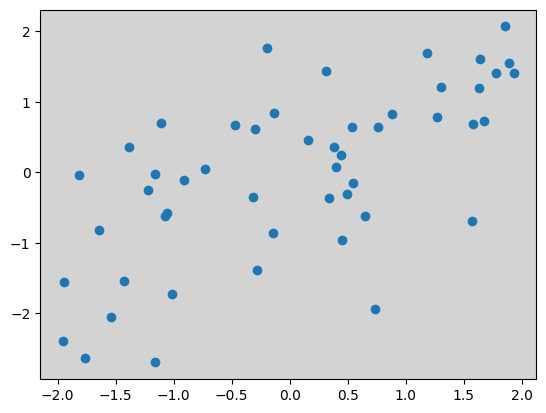

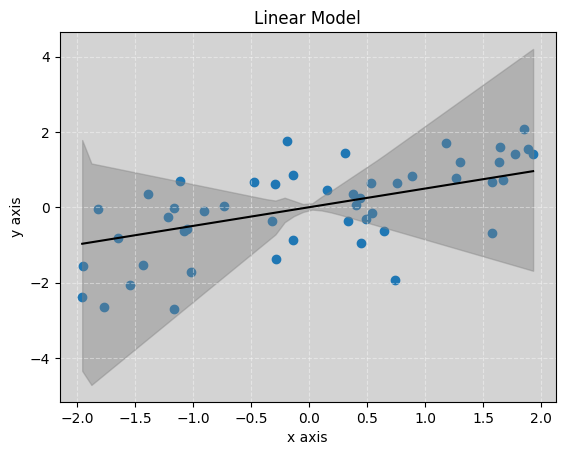

In [8]:
# Plot linear model posteriori

N = 50
alpha = np.random.normal(0, 0.05, N)
beta = np.random.normal(0.5, 1, N)
disturb = np.random.normal(0, 1, N)

predictor = np.random.uniform(-2, 2, N)
outcome = np.mean(alpha) + np.mean(beta) * predictor + disturb

plt.plot(predictor, outcome, 'o')
plt.show()

# =============
Vide.plot_lm(outcome, predictor, alpha, beta, 
          title='Linear Model',
          xlabel='x axis',
          ylabel='y axis')
plt.show()

In [9]:
model = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.5);  // Prioris
        beta ~ normal(0, 0.2);  // Prioris
        sigma ~ exponential(1);  // Prioris
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data = {
    'N': len(outcome),
    'outcome': outcome,
    'predictor': predictor,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00011 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.1 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_u90kl1fa/model_ufngbz74.stan', line 19, column 8 to column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your m

In [10]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,-0.02,0.13,-0.25,0.24
beta,0.50,0.11,0.32,0.70
sigma,0.96,0.10,0.79,1.14


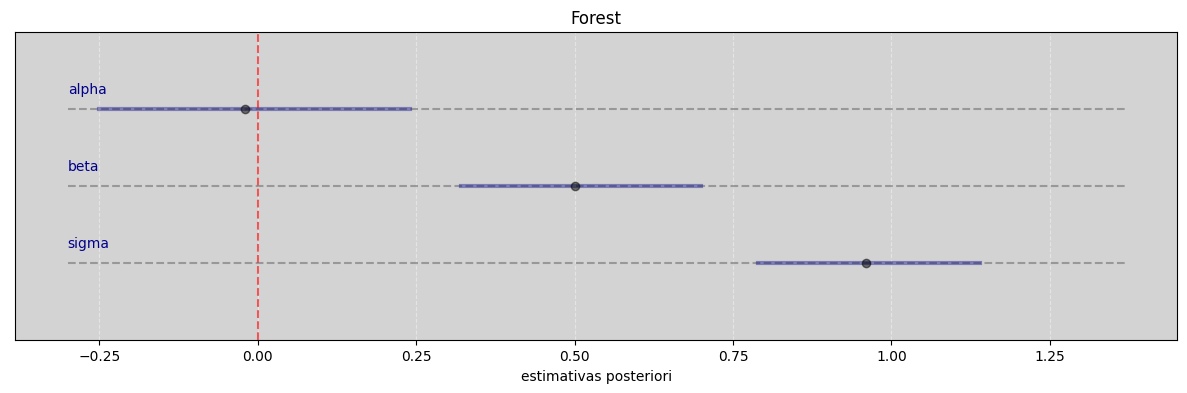

In [11]:
Vide.plot_forest(samples, title='Forest', xlabel='estimativas posteriori')

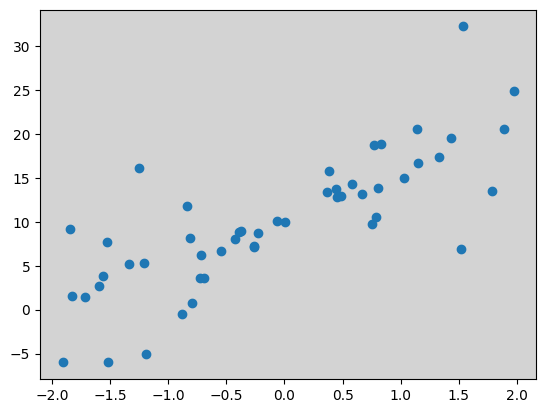

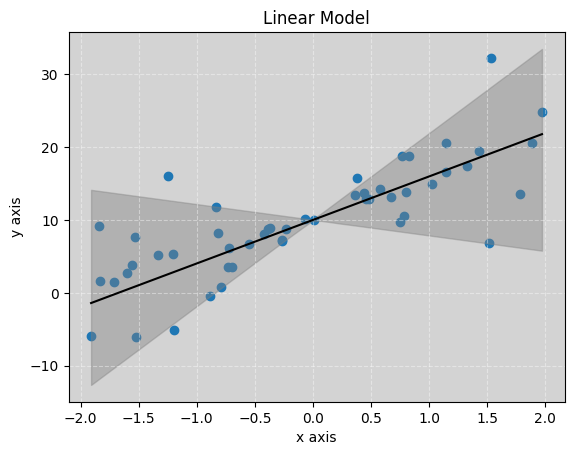

In [12]:
# Plot linear model posteriori (POSITIVE)

N = 50
alpha = np.random.normal(10, 0.05, N)
beta = np.random.normal(5.5, 4, N)

predictor = np.random.uniform(-2, 2, N)
outcome = alpha + beta * predictor

plt.plot(predictor, outcome, 'o')
plt.show()

# =============
Vide.plot_lm(outcome, predictor, alpha, beta, 
          title='Linear Model',
          xlabel='x axis',
          ylabel='y axis')
plt.show()

In [13]:
model = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(10, 5);  // Prioris
        beta ~ normal(5, 2);  // Prioris
        sigma ~ exponential(1);  // Prioris
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data = {
    'N': len(outcome),
    'outcome': outcome,
    'predictor': predictor,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 7.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!


In [14]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,10.50,0.65,9.28,11.64
beta,5.32,0.55,4.33,6.33
sigma,4.61,0.46,3.79,5.41


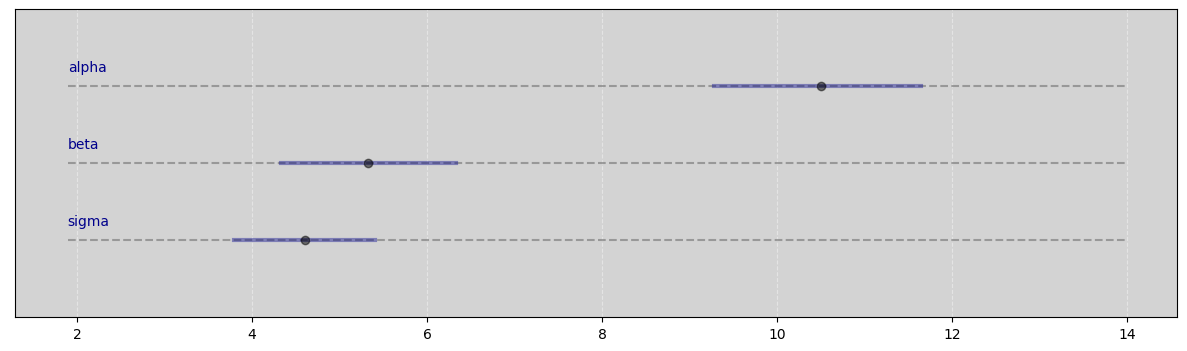

In [15]:
Vide.plot_forest(samples)

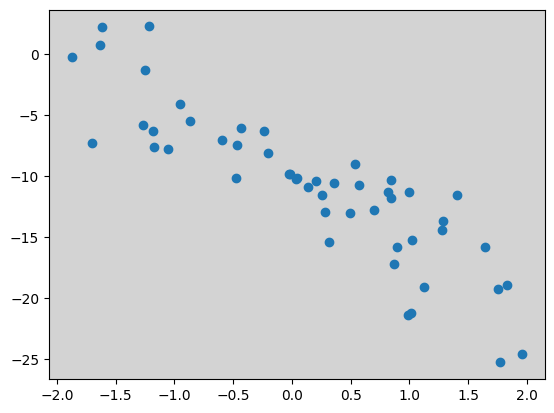

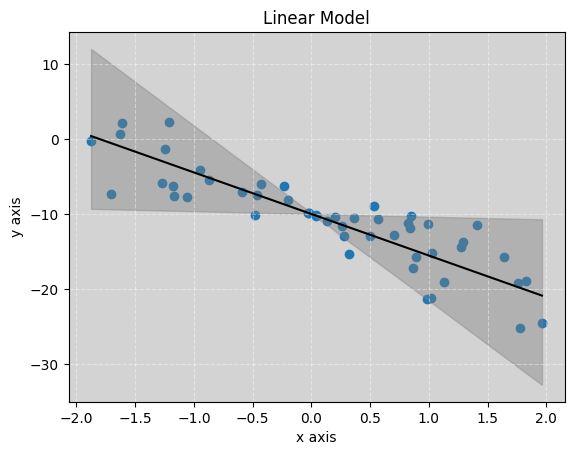

In [16]:
# Plot linear model posteriori (NEGATIVE)

N = 50
alpha = np.random.normal(-10, 0.05, N)
beta = np.random.normal(-5.5, 4, N)

predictor = np.random.uniform(-2, 2, N)
outcome = alpha + beta * predictor

plt.plot(predictor, outcome, 'o')
plt.show()

# =============
Vide.plot_lm(outcome, predictor, alpha, beta, 
          title='Linear Model',
          xlabel='x axis',
          ylabel='y axis')
plt.show()

In [17]:
model = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(10, 5);  // Prioris
        beta ~ normal(5, 2);  // Prioris
        sigma ~ exponential(1);  // Prioris
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data = {
    'N': len(outcome),
    'outcome': outcome,
    'predictor': predictor,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!


In [18]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,-9.88,0.44,-10.70,-9.13
beta,-4.80,0.41,-5.57,-4.06
sigma,3.04,0.31,2.50,3.59


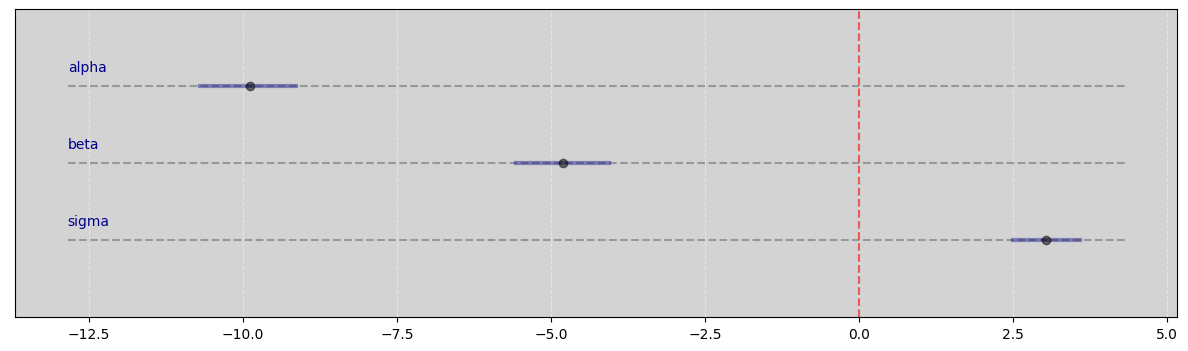

In [19]:
Vide.plot_forest(samples)